In [137]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
from sklearn.model_selection import train_test_split;
np.random.seed(42);


In [138]:
# read space-separated file (use regex separator and python engine)
full_data = pd.read_csv(
    r"F:\Personal Projects\ML-and-DL-Optimisation-Methods\Datasets\housing.csv",
    sep=r'\s+', header=None, encoding="utf-8", engine='python'
)
description = full_data.describe()
# print(full_data.head(10))
full_labeled_data = full_data.copy()

column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

# assign column names (do not wrap the list in another list)
full_labeled_data.columns = column_names

#print(full_labeled_data)
print(full_labeled_data.info())

# So no null data and no non numerical data!

print(full_labeled_data.describe())

print(full_labeled_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

In [139]:
dataframe_in_numpy = full_data.to_numpy();
ones = np.ones((dataframe_in_numpy.shape[0],1));
print(ones.shape);
#dataframe_in_numpy=np.insert(dataframe_in_numpy, dataframe_in_numpy.shape[1]-2,1,axis=1);
print(dataframe_in_numpy[0]);
print(dataframe_in_numpy.shape);
Y = dataframe_in_numpy[:, 13].reshape(506,1); # Full target data
#Y = np.hstack(((np.ones(Y.shape[0],1)), Y));
print(Y.shape);
X = dataframe_in_numpy[:,0:13]; # Full input data
X = np.hstack((ones,X));
print(X.shape);
print(X);

(506, 1)
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00 2.400e+01]
(506, 14)
(506, 1)
(506, 14)
[[1.0000e+00 6.3200e-03 1.8000e+01 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [1.0000e+00 2.7310e-02 0.0000e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [1.0000e+00 2.7290e-02 0.0000e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [1.0000e+00 6.0760e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0000e+00 1.0959e-01 0.0000e+00 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [1.0000e+00 4.7410e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [140]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.2,    # 20% of data goes to testing, 80% to training
    random_state=42   # Sets a seed so your results are reproducible
);


In [141]:
# Initialisations
theta = np.zeros((X.shape[1],1));
print(theta.shape);
y_pred = np.dot(X_train,theta);
print(y_pred.shape);
error = y_train-y_pred;
step_size = 0.01;
G = np.zeros(theta.shape);
print(G.shape);
m = X_train.shape[0];
epsilon = (10**-12);

(14, 1)
(404, 1)
(14, 1)


In [142]:
print(theta);

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [143]:
# Running Adagrad


for i in range(5000001):    
    error = X_train@theta - y_train;
    gradient = (1/m)*((X_train.T)@error);
    G += gradient**2;
    theta = theta - step_size*(gradient)/(np.sqrt(G)+epsilon);
    if (i%1000==0):
        print(f"Iteration: {i}");
        print(theta[0:4]);
    

Iteration: 0
[[0.01]
 [0.01]
 [0.01]
 [0.01]]
Iteration: 1000
[[ 0.18970631]
 [-0.15252184]
 [ 0.09496643]
 [-0.08575305]]
Iteration: 2000
[[ 0.31458179]
 [-0.14409609]
 [ 0.09017754]
 [-0.10882034]]
Iteration: 3000
[[ 0.42290129]
 [-0.13359665]
 [ 0.08631024]
 [-0.10745589]]
Iteration: 4000
[[ 0.51925152]
 [-0.1251733 ]
 [ 0.08379406]
 [-0.09644221]]
Iteration: 5000
[[ 0.6064501 ]
 [-0.11873392]
 [ 0.08222333]
 [-0.08287865]]
Iteration: 6000
[[ 0.68642922]
 [-0.11391206]
 [ 0.08126099]
 [-0.0698852 ]]
Iteration: 7000
[[ 0.76058239]
 [-0.11035585]
 [ 0.08068694]
 [-0.05865385]]
Iteration: 8000
[[ 0.82994686]
 [-0.10776479]
 [ 0.08036056]
 [-0.04948011]]
Iteration: 9000
[[ 0.89531259]
 [-0.10589631]
 [ 0.08019085]
 [-0.04226754]]
Iteration: 10000
[[ 0.95729217]
 [-0.1045616 ]
 [ 0.08011798]
 [-0.03677027]]
Iteration: 11000
[[ 1.01636767]
 [-0.10361728]
 [ 0.08010204]
 [-0.03270626]]
Iteration: 12000
[[ 1.07292334]
 [-0.10295624]
 [ 0.08011623]
 [-0.02980717]]
Iteration: 13000
[[ 1.12726

In [144]:
print(theta);

[[ 1.85914162e+01]
 [-1.07925682e-01]
 [ 3.17200201e-02]
 [ 3.32586858e-02]
 [ 2.74303361e+00]
 [-1.17556725e+01]
 [ 5.09005319e+00]
 [-9.18439779e-03]
 [-1.27975371e+00]
 [ 2.16101567e-01]
 [-9.75977053e-03]
 [-7.38913070e-01]
 [ 1.39749357e-02]
 [-4.79860149e-01]]


In [145]:
print(y_test[0]);
y_final_pred = X_test@theta;
print(y_final_pred[0]);
final_error = y_final_pred-y_test;
print(final_error);

[23.6]
[28.33438677]
[[  4.73438677]
 [  3.26695107]
 [  1.75280334]
 [  1.83371146]
 [  3.19527796]
 [  2.81672017]
 [ -0.12194229]
 [  1.22040867]
 [  2.91940588]
 [  3.92474566]
 [  2.76685934]
 [ -0.48080723]
 [-13.68031302]
 [  0.34288469]
 [  0.46967009]
 [ -3.2585395 ]
 [  1.63081001]
 [ -4.61709375]
 [ -9.43688932]
 [  3.99311733]
 [  1.84183259]
 [  0.58736262]
 [ -0.94693328]
 [  2.46981098]
 [  3.78974977]
 [  1.27964673]
 [  1.91907939]
 [ -0.05237272]
 [  0.37403302]
 [  0.92309755]
 [ -1.73454213]
 [  1.52939089]
 [ 11.68660128]
 [ -3.14608033]
 [ -2.65296207]
 [ -2.18232613]
 [ -3.26197616]
 [  0.7722215 ]
 [ -0.86703629]
 [  0.99208566]
 [ -5.81448885]
 [  3.78306596]
 [ -7.25691716]
 [ -0.41585847]
 [  4.34718427]
 [  1.89828779]
 [  1.17181832]
 [  1.56062403]
 [  0.23274251]
 [  5.7268425 ]
 [  2.02576085]
 [ -1.61868762]
 [  1.45067205]
 [  0.19367184]
 [ -4.25972876]
 [  1.40111616]
 [  0.98285353]
 [  4.31163101]
 [  1.01818158]
 [ -5.63990566]
 [ -1.60720417]
 [ 

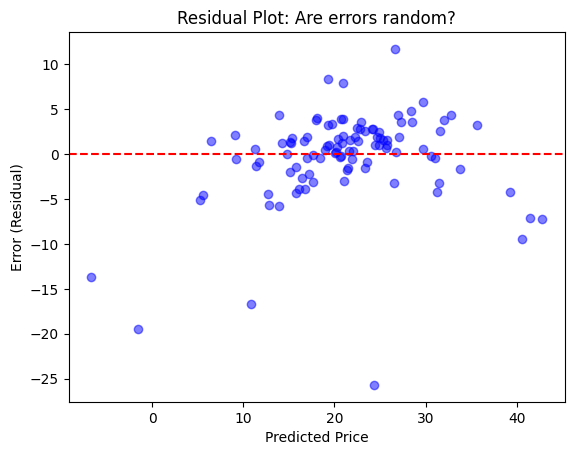

In [146]:
import matplotlib.pyplot as plt

plt.scatter(y_final_pred, final_error, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--') # Zero-error line
plt.xlabel('Predicted Price')
plt.ylabel('Error (Residual)')
plt.title('Residual Plot: Are errors random?')
plt.show()

In [147]:
mae = np.mean(np.abs(final_error));
print(mae);

3.2279918470843403


In [148]:
ss_res = np.sum(final_error**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)
r2 = 1 - (ss_res / ss_tot)

print(f"R^2 Score: {r2:.4f}")

R^2 Score: 0.6497


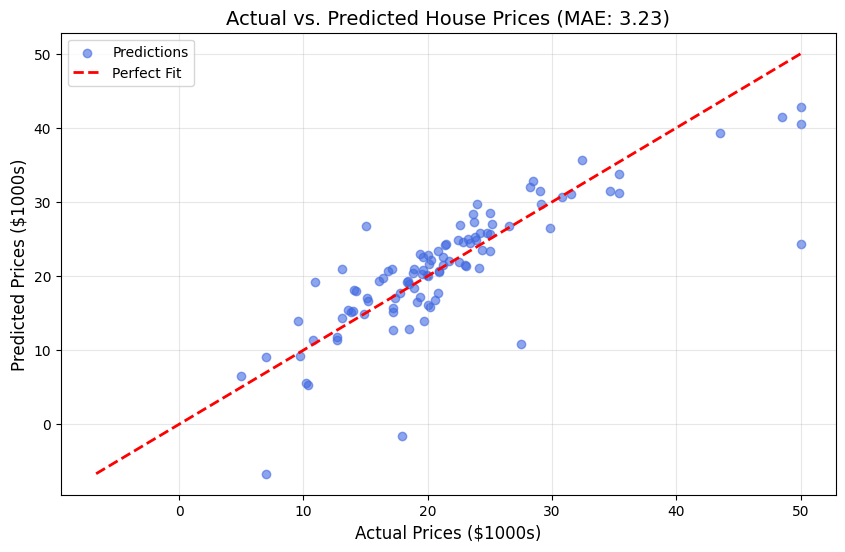

In [149]:
import matplotlib.pyplot as plt

# Set the style
plt.figure(figsize=(10, 6))

# Plotting the scatter points
plt.scatter(y_test, y_final_pred, alpha=0.6, color='royalblue', label='Predictions')

# Plotting the "Perfect Prediction" line
# The line where Actual == Predicted
max_val = max(max(y_test), max(y_final_pred))
min_val = min(min(y_test), min(y_final_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', lw=2, linestyle='--', label='Perfect Fit')

# Labeling
plt.xlabel('Actual Prices ($1000s)', fontsize=12)
plt.ylabel('Predicted Prices ($1000s)', fontsize=12)
plt.title(f'Actual vs. Predicted House Prices (MAE: {np.mean(np.abs(final_error)):.2f})', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()